# [CoE202] note 07b. Linear classification (revisited, Numpy, different data set)

- Class Date : 21.04.29.
- Office Hour : -----------
- If you have any questions, ask via KLMS Q&A board or come to TA office hour to get our help.

In [1]:
# this is just an annotation
import numpy as np # this is for importing numpy library (and we will use abbreviation np for that)
import matplotlib.pyplot as plt # this is for importing matplotlib.pyplot (library for graph plot)
import scipy.io

In [2]:
# load data file from Google drive
from google.colab import drive
drive.mount("/content/drive")

mat = scipy.io.loadmat('/content/drive/My Drive/01_LectureNotes/CoE202/Colab/data/data_nonlinear_classification.mat')

data = mat['data']
label = mat['label']

Mounted at /content/drive


In [3]:
# define our linear classifier
class linear_classifier():

    # initialization
    def __init__(self, W_init, b_init):
        super(linear_classifier, self).__init__()
        self.W = W_init
        self.b = b_init
    # forward pass
    def forward(self, x):
        z = np.matmul(self.W,x)+self.b
        y = 1/(1+np.exp(-z))
        return y
    # backward pass
    def backward(self, x, y, label):
        loss = cross_entropy(y, label)

        dLdz = (y-label)
        dLdb = np.mean(dLdz)  
        dLdw = np.mean(x*np.repeat(dLdz, 2, axis=0), axis=1)

        loss_avg = np.mean(loss)        
        prediction_threshold = (y>0.5)
        accuracy = np.mean(prediction_threshold==label)

        return loss_avg, accuracy, dLdw, dLdb
    # update parameters
    def update(self, dW, db):
        self.W = self.W + dW
        self.b = self.b + db   
    # retrieve weights
    def getWb(self):
        return self.W, self.b

# define cross entropy loss
def cross_entropy(prediction, label):
    epsilon = 1e-10
    prediction = np.clip(prediction, epsilon, 1. - epsilon)
    ce = -( np.log(prediction) *label + np.log(1-prediction)*(1-label))
    return ce             

In [4]:
# define a function to plot data
def show_data_binary_class(data, label):
    fig, ax = plt.subplots()
    ind = 0
    for color in ['tab:blue', 'tab:orange']:
        current_ind = np.where(label==ind)[1]
        x = data[0,current_ind]
        y = data[1,current_ind]
        ax.scatter(x, y, c=color, edgecolors='none')
        ind +=1

In [5]:
# initialize my classifier
W_init = np.random.rand(1,2)
b_init = np.random.rand(1,1)
my_classifier = linear_classifier(W_init, b_init)
W, b = my_classifier.getWb()

# test our initial (untrained) classifier
prediction = my_classifier.forward(data)
prediction_threshold = (prediction>0.5)

ground truth


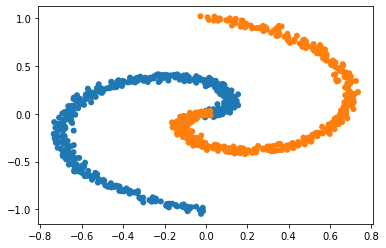

In [6]:
# show ground truth classification
print('ground truth')
show_data_binary_class(data, label)

current classification


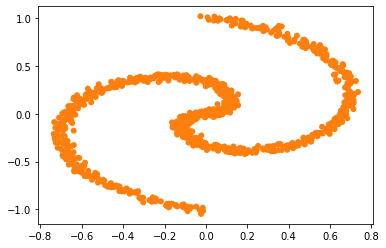

In [7]:
# show the performance of untrained classifier
print('current classification')
show_data_binary_class(data, prediction_threshold)

In [8]:
# train linear classifier
n_iter = 10000
learning_rate = 0.05
loss_iter = np.zeros(n_iter, dtype=float)
accuracy_iter = np.zeros(n_iter, dtype=float)
for iter in range(n_iter):
    prediction =  my_classifier.forward(data)
    [loss, accuracy, dLdw, dLdb] =  my_classifier.backward(data, prediction, label)
    dW = -learning_rate*dLdw
    db = -learning_rate*dLdb
    my_classifier.update(dW, db)
    loss_iter[iter] = loss

    prediction_threshold = (prediction>0.5)
    accuracy_iter[iter] = accuracy

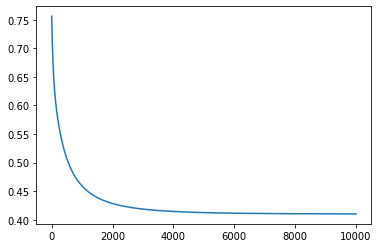

In [9]:
# show loss during training
plt.plot( range(1,n_iter+1), loss_iter)  

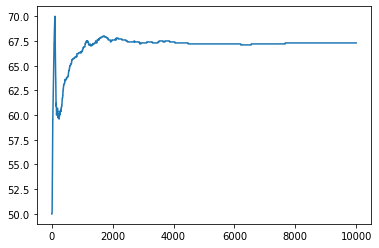

In [10]:
# show accuracy during training
plt.plot(  range(1,n_iter+1), 100*accuracy_iter)  

current classification


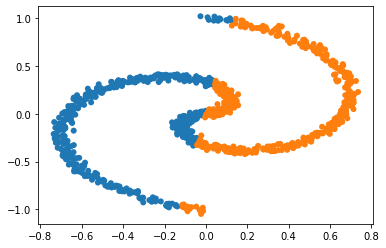

In [11]:
# show result from trained classifier
print('current classification')
show_data_binary_class(data, prediction_threshold)

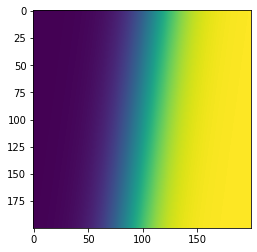

In [12]:
Xtest = np.mgrid[-1:1:0.01, -1:1:0.01].reshape(2,-1)

prediction = my_classifier.forward(Xtest)
prediction_img = np.rot90(prediction.reshape(200, 200), k=1, axes=(0, 1))
plt.imshow(prediction_img)